### Impact of Hyperparamter tunning
- model performance
- training time 
- compute resources

### Popular methods:
- Grid Search
- random search

### Overview of some hyperparameters for popular modeling techniques and their impacts on generalization

#### Logistic Regression
- **Regularization Strength (C in Scikit-Learn or Lambda in other frameworks):**
Regularization is used to prevent overfitting by penalizing large coefficients in the model. In logistic regression, regularization is typically applied to the weights.
Impact:
A smaller value of C (or a larger value of lambda) increases the regularization strength, which can prevent overfitting but might lead to underfitting if the regularization is too strong.
Conversely, a larger C (or smaller lambda) reduces regularization, allowing the model to fit more closely to the training data, which can be beneficial if the model is underfitting but might lead to overfitting.
- **Solver:**
This hyperparameter determines the optimization algorithm used for finding the parameters that minimize the cost function.
Impact:
Different solvers can be more efficient for different types of datasets. For example, 'liblinear' works well for small datasets, while 'sag' and 'saga' are faster for large ones.
Some solvers support only certain types of regularization or none at all. For instance, 'liblinear' supports both L1 and L2 regularization, while 'saga' supports elastic net regularization (a combination of L1 and L2).
The choice of solver can affect the speed of convergence and the accuracy of the solution.

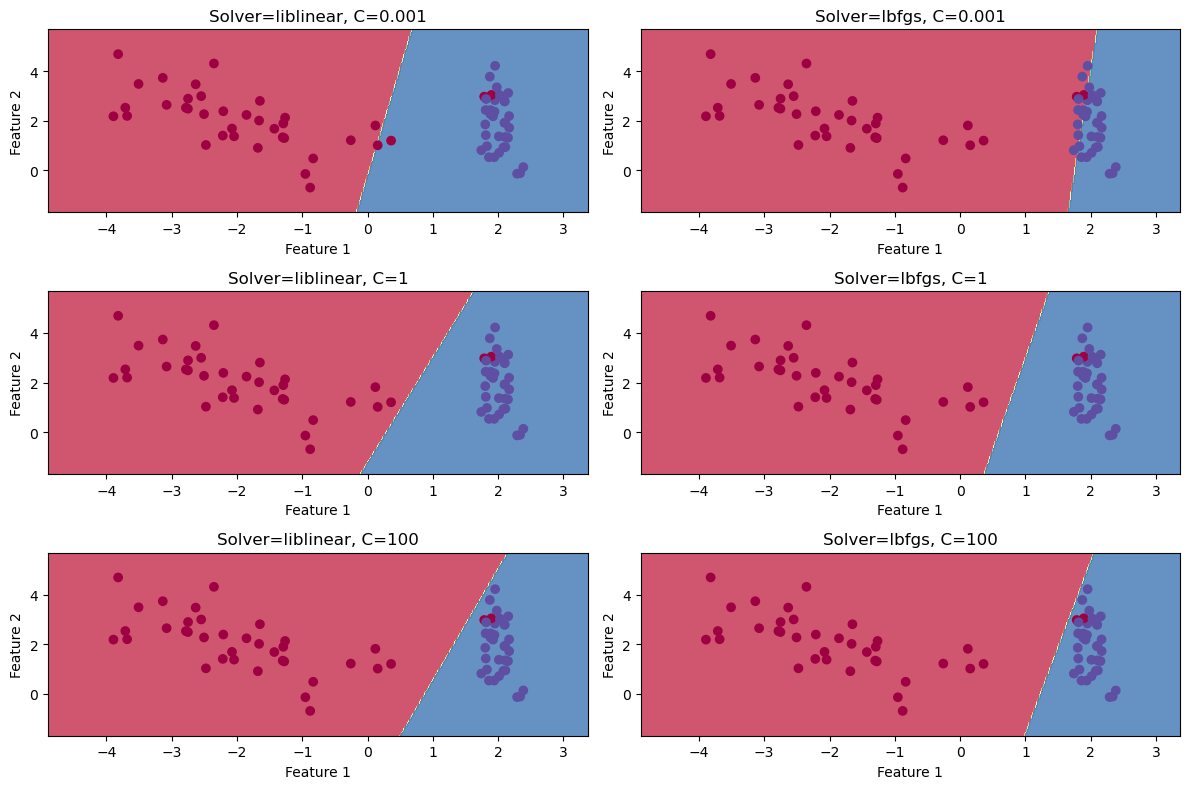

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, flip_y=0.1, class_sep=2,
                           random_state=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def plot_decision_boundary(model, X, y, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Different hyperparameter settings
C_values = [0.001, 1, 100]
solvers = ['liblinear', 'lbfgs']

plt.figure(figsize=(12, 8))

for i, C in enumerate(C_values):
    for j, solver in enumerate(solvers):
        # Train logistic regression model
        model = LogisticRegression(C=C, solver=solver, random_state=0)
        model.fit(X_train, y_train)

        # Subplot index
        plt_idx = i * len(solvers) + j + 1
        plt.subplot(len(C_values), len(solvers), plt_idx)

        plot_title = f"Solver={solver}, C={C}"
        plot_decision_boundary(model, X_train, y_train, plot_title)

plt.tight_layout()
plt.show()


#### K-Nearest Neighbors (KNN):

- **Number of Neighbors (k):** Determines how many neighbors influence the classification or regression. A small k can make the model sensitive to noise in the dataset, while a larger k provides smoother decision boundaries, which can improve generalization but may lead to underfitting.
- **Distance Metric:** Such as Euclidean, Manhattan, or Minkowski. The choice of distance metric can significantly affect the performance, especially in high-dimensional spaces.

#### Principal Component Analysis (PCA):

- Number of Components: Specifies the number of principal components to keep. Reducing the number of components can help in dimensionality reduction, potentially improving model generalization by removing noise and redundant features.
- Variance Ratio: Deciding how much variance to retain can affect the model's ability to capture important features.
#### Convolutional Neural Networks (CNNs):

- Number of Layers and Filter Size: These parameters define the architecture's depth and breadth, impacting its ability to learn complex patterns. Overly complex architectures might overfit, while too simple ones might underfit.
- Dropout Rate: Helps in preventing overfitting by randomly dropping units (along with their connections) from the neural network during training.

#### Deep Learning (Neural Networks):

- **Learning Rate:** Perhaps the most crucial hyperparameter. A high learning rate can cause the model to converge too quickly to a suboptimal solution, while a low learning rate can lead to a long training process that might get stuck in local minima. Proper tuning is critical for generalization.

- **Batch Size:** Influences the stability of the learning process. Smaller batches often lead to more noise in the training process, which can help escape local minima but can also cause instability. Larger batches provide a more accurate estimate of the gradient, but they can also lead to overfitting.

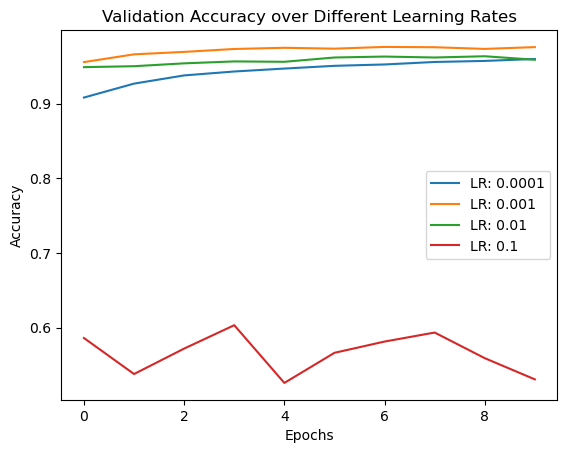

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten  # Added Flatten here
from tensorflow.keras.optimizers import Adam

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Define a function to create a model
def create_model(lr=0.001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten layer is now correctly imported
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Test different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
history_dict = {}

for lr in learning_rates:
    model = create_model(lr)
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)
    history_dict[lr] = history

# Plot the results
for lr, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f'LR: {lr}')

plt.title('Validation Accuracy over Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Support Vector Machines (SVMs):

- **C (Regularization parameter):** Determines the trade-off between achieving a low training error and a low testing error (i.e., generalization). A small C makes the decision surface smooth, while a large C aims at classifying all training examples correctly by giving the model more freedom to increase its complexity.
- **Kernel Parameters:** The choice of kernel (linear, polynomial, RBF, etc.) and its parameters (like degree for polynomial) can greatly affect the model's capacity to handle complex patterns. Improper kernel choice or parameters can lead to overfitting or underfitting.

#### Decision Trees:

- **Max Depth:** Controls the depth of the tree. A deeper tree can model more complex patterns but might overfit the data. A shallower tree might underfit and not capture important patterns.
- **Min Samples Split:** The minimum number of samples required to split an internal node. Larger values prevent creating nodes that model noise in the data, thus aiding in generalization.

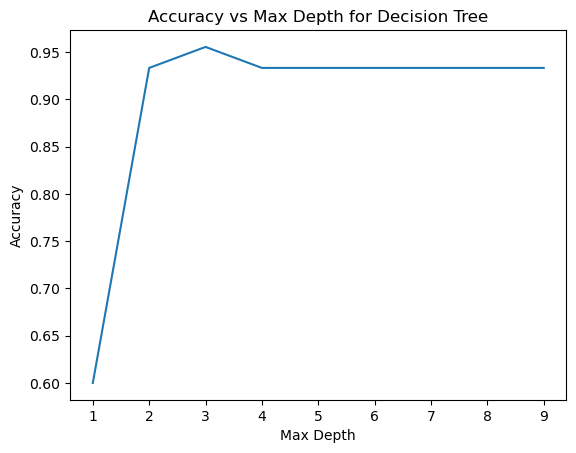

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Test different tree depths
max_depths = range(1, 10)
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

# Plot the results
plt.plot(max_depths, accuracies)
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


#### Random Forests:

- **Number of Trees:** More trees in the forest typically lead to better performance and robustness but can slow down the training and prediction process.
- **Max Features:** The size of the feature subset for splitting at each node. Adjusting this can help in reducing variance and increasing bias, aiding in generalization.

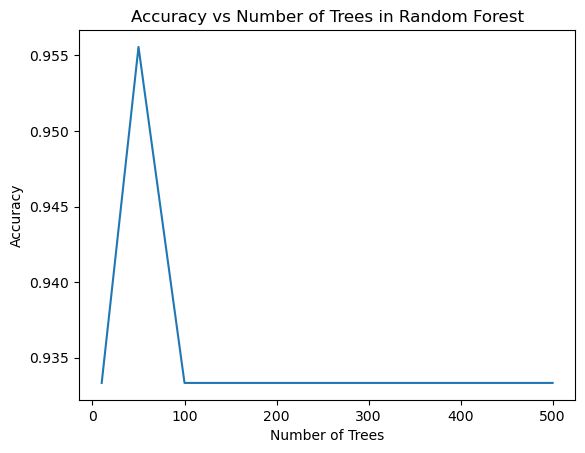

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Test different numbers of trees
num_trees = [10, 50, 100, 200, 500]
accuracies = []

for n in num_trees:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

# Plot the results
plt.plot(num_trees, accuracies)
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()


#### Gradient Boosting Machines (GBMs):

- **Number of Estimators:** Represents the number of boosting stages to be run. More stages can lead to better fit but can also lead to overfitting.
- **Learning Rate:** Controls the contribution of each tree in the ensemble. A lower value can be compensated by a higher number of estimators, potentially leading to a more generalized model but increasing computational cost.